In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [4]:
df.tarih=df.tarih.apply(pd.to_datetime)
df.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A


In [5]:
df["yıl"]=df.tarih.dt.year
df["ay"]=df.tarih.dt.month
df=df.drop("tarih",axis=1)

In [6]:
df.describe()

,ürün besin değeri,ürün fiyatı,yıl,ay
count,227520.000000,227520.000000,227520.000000,227520.00000
mean,143.113924,16.348622,2018.000000,6.50000
std,133.218871,13.260935,1.414217,3.45206
min,8.000000,0.730000,2016.000000,1.00000
25%,41.000000,7.330000,2017.000000,3.75000
50%,83.000000,12.600000,2018.000000,6.50000
75%,250.000000,20.900000,2019.000000,9.25000
max,402.000000,141.330000,2020.000000,12.00000


In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df["ürün"]=le.fit_transform(df["ürün"])

df["ürün üretim yeri"]=le.fit_transform(df["ürün üretim yeri"])
df["market"]=le.fit_transform(df["market"])
df["şehir"]=le.fit_transform(df["şehir"])
df["yıl"]=le.fit_transform(df["yıl"])

In [8]:
df.head(20)

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,yıl,ay
0,65,120,0,33.41,1,2,0,0,1
1,70,103,0,11.22,1,2,0,0,1
2,61,160,0,11.12,1,2,0,0,1
3,1,354,3,7.02,1,2,0,0,1
4,2,72,3,13.14,1,2,0,0,1
5,3,42,3,5.05,1,2,0,0,1
6,4,346,3,5.97,1,2,0,0,1
7,5,47,3,12.19,1,2,0,0,1
8,6,25,3,12.15,1,2,0,0,1
9,7,47,3,23.53,1,2,0,0,1


In [9]:
df.describe()

,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,yıl,ay
count,227520.000000,227520.000000,227520.000000,227520.000000,227520.000000,227520.000000,227520.000000,227520.000000,227520.00000
mean,39.000000,143.113924,2.987342,16.348622,0.500000,1.000000,3.500000,2.000000,6.50000
std,22.803559,133.218871,1.257826,13.260935,0.500001,0.816498,2.291293,1.414217,3.45206
min,0.000000,8.000000,0.000000,0.730000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,19.000000,41.000000,2.000000,7.330000,0.000000,0.000000,1.750000,1.000000,3.75000
50%,39.000000,83.000000,3.000000,12.600000,0.500000,1.000000,3.500000,2.000000,6.50000
75%,59.000000,250.000000,4.000000,20.900000,1.000000,2.000000,5.250000,3.000000,9.25000
max,78.000000,402.000000,5.000000,141.330000,1.000000,2.000000,7.000000,4.000000,12.00000


<AxesSubplot:xlabel='ay', ylabel='ürün fiyatı'>

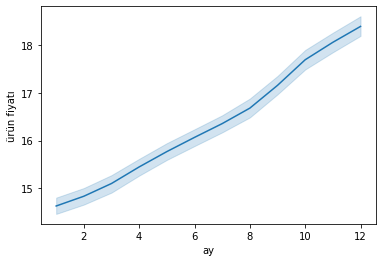

In [10]:
sns.lineplot(x=df.loc[:,"ay"],y=df["ürün fiyatı"])

In [11]:
df_cor=df.corr()
df_cov=df.cov()
df_cor["ürün fiyatı"]

ürün                 0.180560
ürün besin değeri    0.017858
ürün kategorisi     -0.189127
ürün fiyatı          1.000000
ürün üretim yeri     0.001386
market              -0.002102
şehir               -0.001854
yıl                  0.436121
ay                   0.091105
Name: ürün fiyatı, dtype: float64

In [12]:
df_cov["ürün fiyatı"]

ürün                  54.600823
ürün besin değeri     31.548434
ürün kategorisi       -3.154620
ürün fiyatı          175.852410
ürün üretim yeri       0.009191
market                -0.022759
şehir                 -0.056338
yıl                    8.178933
ay                     4.170549
Name: ürün fiyatı, dtype: float64

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ürün fiyatı', ylabel='Density'>

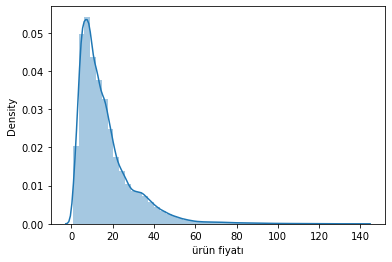

In [13]:
sns.distplot(df["ürün fiyatı"])

In [14]:
len(df)*0.02

4550.400000000001

In [15]:
df_1=df.sort_values("ürün fiyatı",ascending=False).iloc[4550:]

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ürün fiyatı', ylabel='Density'>

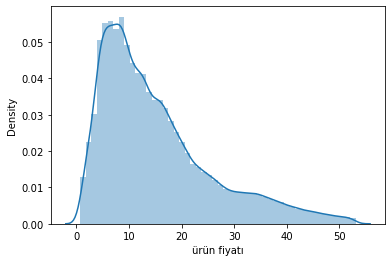

In [16]:
sns.distplot(df_1["ürün fiyatı"])

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()

In [19]:
x=df.loc[:,["yıl","ay","ürün","market","şehir","ürün üretim yeri"]]
y=df["ürün fiyatı"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [29]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Activation,Flatten

ModuleNotFoundError: No module named 'keras'

In [ ]:
model = Sequential()
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse", metrics=['accuracy'])

In [ ]:
history =model.fit(x_train, 
                y_train,
                validation_data=(x_test, y_test),
                epochs=300)

In [ ]:
sonuc=model.predict(x_test)

In [ ]:
sonuc_df=pd.DataFrame(sonuc)

In [ ]:
writer = pd.ExcelWriter('pandas_3.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
sonuc.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [ ]:
sonuc

In [ ]:
y_t2=pd.DataFrame(y_test)

In [ ]:
sonuc4=sonuc-y_test.values

In [ ]:
sonuc4.min()

In [ ]:
sonuc4.max()

In [21]:
sonuc4.mean()

NameError: name 'sonuc4' is not defined

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [23]:
hıst=lin_reg.fit(x_train,y_train)
sonuc2=hıst.predict(x_test)

In [24]:
asd=sonuc2-y_test
asd

208282     7.770335
199599   -20.224131
185287    13.843927
35909     -5.335881
175393    -6.839211
            ...    
39289      0.455234
147268    -0.968877
62732      3.952017
17481     -8.752814
208737     0.829933
Name: ürün fiyatı, Length: 68256, dtype: float64

In [25]:
asd.describe()

count    68256.000000
mean         0.081725
std         11.233303
min        -88.929298
25%         -5.670150
50%          2.233786
75%          7.551283
max         19.673122
Name: ürün fiyatı, dtype: float64

In [26]:
plt.scatter(sonuc,y_test,color='red')
plt.show()

NameError: name 'sonuc' is not defined

NameError: name 'history' is not defined

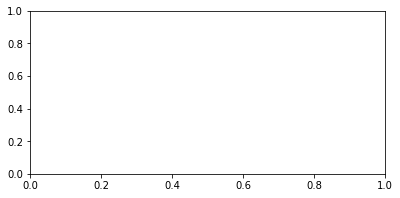

In [27]:
from matplotlib import pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
df_test=pd.read_csv("testFeatures.csv")
df_test.tarih=df_test.tarih.apply(pd.to_datetime)
df_test["yıl"]=df_Test.tarih.dt.year
df_test["ay"]=df_test.tarih.dt.month
df_test["ürün"]=le.fit_transform(df_test["ürün"])
df_test["ürün kategorisi"]=le.fit_transform(df_test["ürün kategorisi"])
df_test["ürün üretim yeri"]=le.fit_transform(df_test["ürün üretim yeri"])
df_test["market"]=le.fit_transform(df_test["market"])
df_test["şehir"]=le.fit_transform(df_test["şehir"])
x_test=df_test.loc[:,["yıl","ay","ürün","ürün besin değeri","ürün kategorisi"]]

NameError: name 'df_Test' is not defined

In [ ]:
df_test=df_test.drop(['id'], axis=1)
sonuc=model.predict(x_test)

In [ ]:
writer = pd.ExcelWriter('pandas_3.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
sonuc.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()